In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/DatasetMedidor/positions.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: positions/validation/1/000000000001142.png  
  inflating: positions/validation/1/000000000001143.png  
  inflating: positions/validation/1/000000000001144.png  
  inflating: positions/validation/1/000000000001145.png  
  inflating: positions/validation/1/000000000001146.png  
  inflating: positions/validation/1/000000000001147.png  
  inflating: positions/validation/1/000000000001148.png  
  inflating: positions/validation/1/000000000001149.png  
  inflating: positions/validation/1/000000000001150.png  
  inflating: positions/validation/1/000000000001151.png  
  inflating: positions/validation/1/000000000001152.png  
  inflating: positions/validation/1/000000000001153.png  
  inflating: positions/validation/1/000000000001154.png  
  inflating: positions/validation/1/000000000001155.png  
  inflating: positions/validation/1/000000000001156.png  
  inflating: positions/validation/1/000000000001157.png  
  inf

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
img_height, img_width = 224,224
BATCH_SIZE = 32

In [ ]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    "positions/train",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "positions/validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE
)

#test_ds = tf.keras.utils.image_dataset_from_directory(
#    "positions/test",
#    subset="testing",
#    image_size = (img_height, img_width)
#    ,batch_size = BATCH_SIZE
#)



Found 6074 files belonging to 10 classes.
Found 6074 files belonging to 10 classes.


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
class_names = train_ds.class_names
names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


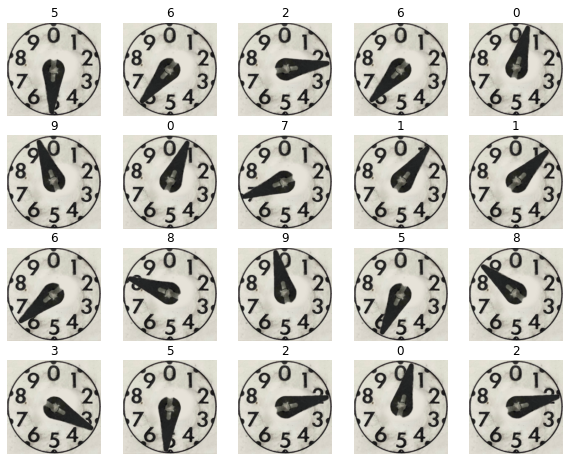

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

plt.figure(figsize= (10,10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
for i, (images, labels) in enumerate(train_ds.take(20)):
  plt.subplot(5, 5, i + 1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(class_names[labels[i]])
  plt.axis("off")

In [ ]:
model = tf.keras.Sequential ([
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),

     tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(10)                              
])

In [ ]:
model.compile (
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics = ['accuracy']
)

In [ ]:
EPOCHS = 100;
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE
)

Epoch 1/100
190/190 [==============================] - 58s 251ms/step - loss: 0.2522 - accuracy: 0.9183 - val_loss: 7.9553e-04 - val_accuracy: 1.0000
Epoch 2/100
190/190 [==============================] - 45s 233ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 5.9872e-06 - val_accuracy: 1.0000
Epoch 3/100
190/190 [==============================] - 41s 215ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 4/100
190/190 [==============================] - 36s 188ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 4.0605e-05 - val_accuracy: 1.0000
Epoch 5/100
190/190 [==============================] - 45s 237ms/step - loss: 1.3073e-04 - accuracy: 1.0000 - val_loss: 1.0397e-06 - val_accuracy: 1.0000
Epoch 6/100
190/190 [==============================] - 47s 244ms/step - loss: 7.7268e-05 - accuracy: 1.0000 - val_loss: 5.9993e-07 - val_accuracy: 1.0000
Epoch 7/100
190/190 [==============================] - 48s 250ms/step - loss: 1.3309e-04 - accur

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save("model.h5")

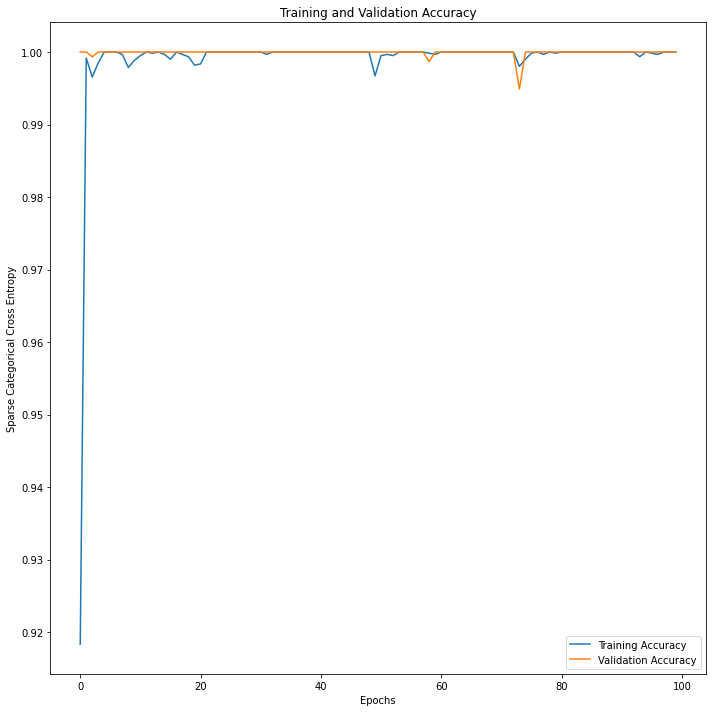

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 10))
#plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylabel('Sparse Categorical Cross Entropy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.tight_layout()

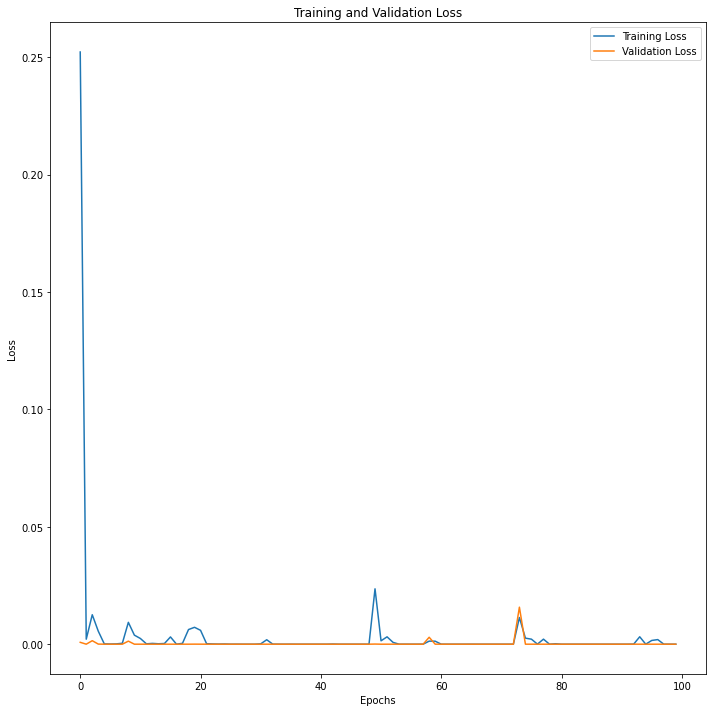

In [ ]:
#plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 10))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import itertools
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
new_model = load_model("model.h5") # Cargar modelo desde 'Archivos'

In [ ]:
test_data_dir = "positions/test"

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size= BATCH_SIZE,
    class_mode = "categorical",
    shuffle=False
)

Found 6074 images belonging to 10 classes.


In [ ]:
custom_model = load_model("model.h5")

predictions = custom_model.predict_generator(generator = test_generator)

y_pred = np.argmax(predictions, axis = 1)
y_real = test_generator.classes

<ipython-input-11-13611de3deee>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_model.predict_generator(generator = test_generator)


In [ ]:
print(y_real)

[0 0 0 ... 9 9 9]


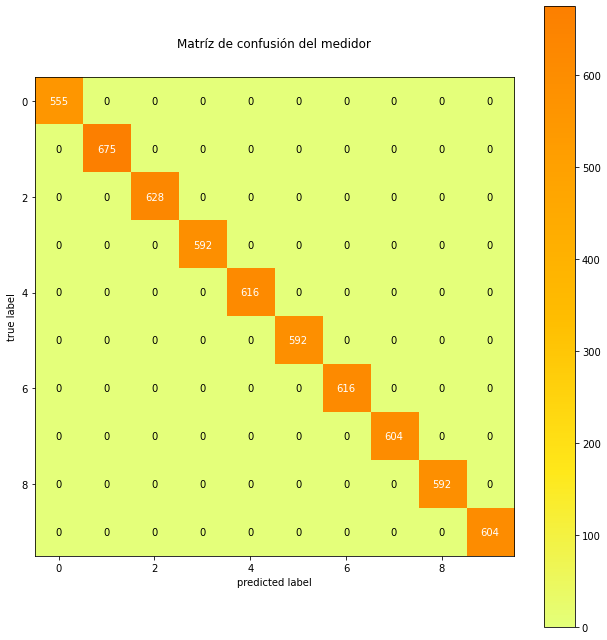

In [ ]:
mat_c = confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat= mat_c, figsize = (9,9), show_normed = False, colorbar=True, cmap='Wistia')
plt.title("Matríz de confusión del medidor")
plt.tight_layout()